https://morvanzhou.github.io/tutorials/python-basic/threading/1-why/

**<font size=5> 添加线程 Thread</font>**

In [16]:
import threading
import time
from queue import Queue

In [2]:
threading.active_count()

5

In [3]:
threading.enumerate()

[<_MainThread(MainThread, started 5500)>,
 <Thread(Thread-4, started daemon 8460)>,
 <Heartbeat(Thread-5, started daemon 12596)>,
 <HistorySavingThread(IPythonHistorySavingThread, started 16580)>,
 <ParentPollerWindows(Thread-3, started daemon 19364)>]

In [5]:
threading.current_thread()

<_MainThread(MainThread, started 5500)>

In [4]:
def thread_job():
    print('This is a thread of %s' % threading.current_thread())

def main():
    thread = threading.Thread(target=thread_job,)   # 定义线程 
    thread.start()  # 让线程开始工作
    
if __name__ == '__main__':
    main()

This is a thread of <Thread(Thread-6, started 13352)>


**<font size=5> join 功能</font>**

In [9]:
def thread_job():
    print("T1 start\n")
    for i in range(10):
        time.sleep(0.1) # 任务间隔0.1s
    print("T1 finish\n")

def main():
    added_thread = threading.Thread(target=thread_job, name='T1')
    added_thread.start()
    #added_thread.join() #使用join对控制多个线程的执行顺序非常关键
    print("all done\n")
if __name__ == '__main__':
    main()

T1 start

T1 finish

all done



In [14]:
def T1_job():
    print("T1 start\n")
    for i in range(10):
        time.sleep(0.1)
    print("T1 finish\n")

def T2_job():
    print("T2 start\n")
    print("T2 finish\n")

def main():    
    thread_1 = threading.Thread(target=T1_job, name='T1')
    thread_2 = threading.Thread(target=T2_job, name='T2')
    
    #-------------------
    thread_1.start() # 开启T1
    #thread_1.join() # notice the difference!
    thread_2.start() # 开启T2
    #thread_1.join() # notice the difference!
    print("all done\n")
    #--------------------
    
    #------------------此種順序較佳
    #thread_1.start() # start T1
    #thread_2.start() # start T2
    #thread_2.join() # join for T2
    #thread_1.join() # join for T1
    #------------------
if __name__ == '__main__':
    main()

T1 start

T1 finish

T2 start
all done

T2 finish




**<font size=5> 添加线程 Thread</font>**

In [28]:
import threading
import time

from queue import Queue

def job(l,q):
    for i in range (len(l)):
        l[i] = l[i]**2
    q.put(l) #多线程调用的函数不能用return返回值
    

def multithreading():
    q =Queue()
    threads = []
    data = [[1,2,3],[3,4,5],[4,4,4],[5,5,5]]
    for i in range(4):
        t = threading.Thread(target=job,args=(data[i],q))
        t.start()
        threads.append(t)
        
    for thread in threads:
        thread.join()
    results = []
    for _ in range(4):
        results.append(q.get())
    print(results)

if __name__=='__main__':
    multithreading()

[[1, 4, 9], [9, 16, 25], [16, 16, 16], [25, 25, 25]]


**<font size=5> GIL 不一定有效率 </font>**

In [31]:
import threading
from queue import Queue
import copy
import time

def job(l, q):
    res = sum(l)
    q.put(res)

def multithreading(l):
    q = Queue()
    threads = []
    for i in range(4):
        t = threading.Thread(target=job, args=(copy.copy(l), q), name='T%i' % i)
        t.start()
        threads.append(t)
    [t.join() for t in threads]
    total = 0
    for _ in range(4):
        total += q.get()
    print(total)

def normal(l):
    total = sum(l)
    print(total)

if __name__ == '__main__':
    l = list(range(1000000))
    s_t = time.time()
    normal(l*4)
    print('normal: ',time.time()-s_t)
    s_t = time.time()
    multithreading(l)
    print('multithreading: ', time.time()-s_t)

1999998000000
normal:  0.1918811798095703
1999998000000
multithreading:  0.18588638305664062


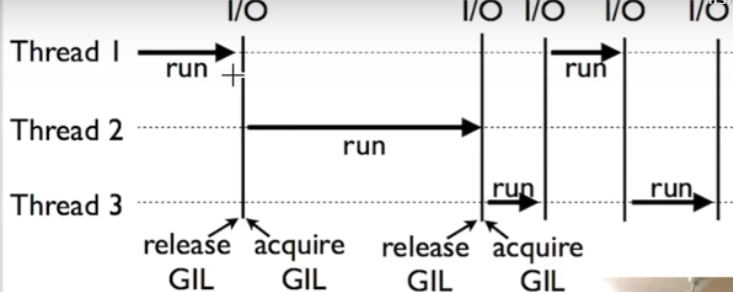

**<font size=5> 线程锁 Lock </font>**

不使用lock

In [29]:
import threading

def job1():
    global A
    for i in range(10):
        A+=1
        print('job1',A)
        
def job2():
    global A
    for i in range(10):
        A+=10
        print('job2',A)
if __name__== '__main__':
    A=0
    t1=threading.Thread(target=job1)
    t2=threading.Thread(target=job2)
    t1.start()
    t2.start()
    t1.join()
    t2.join()

job1 1
job1 2
job1 3
job1 4
job1 5
job2 15
job2 25
job2 35
job2 45
job2 55
job2 job1 65
job2 76
job266 
job1 87
job1 88
job1 89
job1 90
86
job2 100
job2 110


使用lock

In [30]:
import threading

def job1():
    global A,lock
    lock.acquire()
    for i in range(10):
        A+=1
        print('job1',A)
    lock.release()

def job2():
    global A,lock
    lock.acquire()
    for i in range(10):
        A+=10
        print('job2',A)
    lock.release()

if __name__== '__main__':
    lock=threading.Lock()
    A=0
    t1=threading.Thread(target=job1)
    t2=threading.Thread(target=job2)
    t1.start()
    t2.start()
    t1.join()
    t2.join()

job1 1
job1 2
job1 3
job1 4
job1 5
job1 6
job1 7
job1 8
job1 9
job1 10
job2 20
job2 30
job2 40
job2 50
job2 60
job2 70
job2 80
job2 90
job2 100
job2 110
